In [1]:
import pandas as pd 
import os 

In [2]:
carpeta1="MesJunio"
carpeta2="MesJulio"

In [3]:
def listar_archivos_csv(carpeta):
    return [os.path.join(carpeta,archivo) for archivo 
            in os.listdir(carpeta) if 
            archivo.endswith('.csv')]

In [4]:
archivos_carpeta1=listar_archivos_csv(carpeta1)
archivos_carpeta2=listar_archivos_csv(carpeta2)

In [5]:
archivos_csv=archivos_carpeta1+archivos_carpeta2

In [6]:
dataframes=[pd.read_csv(archivo) for archivo in archivos_csv]

In [7]:
df_conbinado=pd.concat(dataframes,ignore_index=True)

In [8]:
df_conbinado['Mb_dl']=df_conbinado['l_thrp_bits_dl']/1000000
df_conbinado['Mb_ul']=df_conbinado['l_thrp_bits_ul']/1000000
df_conbinado['totalMb']=df_conbinado['Mb_dl']+df_conbinado['Mb_ul']
df_conbinado.head()

,fecha,hora,altan_site_id,sector,cell_id,estado,l_thrp_bits_dl,l_thrp_bits_ul,"cast(ctgs.latitud as decimal(9,5))","cast(ctgs.longitud as decimal(9,5))",Mb_dl,Mb_ul,totalMb
0,2024-06-01,00:00,7,1,21,activo,30424474480,1685966904,21.8734,-102.26918,30424.474480,1685.966904,32110.441384
1,2024-06-01,01:00,7,1,21,activo,16043875224,686590560,21.8734,-102.26918,16043.875224,686.590560,16730.465784
2,2024-06-01,02:00,7,1,21,activo,16152159880,824952328,21.8734,-102.26918,16152.159880,824.952328,16977.112208
3,2024-06-01,03:00,7,1,21,activo,8083606088,348546072,21.8734,-102.26918,8083.606088,348.546072,8432.152160
4,2024-06-01,04:00,7,1,21,activo,10439212640,1013515192,21.8734,-102.26918,10439.212640,1013.515192,11452.727832


In [9]:
df_fecha=df_conbinado.groupby('fecha').agg({'totalMb':'sum'}).reset_index()

In [10]:
df_fecha1=df_conbinado.groupby('fecha').agg({'totalMb':'sum'}).reset_index()

In [11]:
df_fecha1.head()

,fecha,totalMb
0,2024-06-01,2.378064e+10
1,2024-06-02,2.344779e+10
2,2024-06-03,2.351177e+10
3,2024-06-04,2.359690e+10
4,2024-06-05,2.368501e+10


In [12]:
import numpy as np 
import statsmodels as sm 
import matplotlib.pyplot as plt 
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [13]:
def stationarity_test(timeseries):
    from statsmodels.tsa.stattools import adfuller
    print("Results of Dickey-Fuller Test; ")
    df_test=adfuller(timeseries,autolag="AIC")
    df_output=pd.Series(df_test[0:4],index=["Test statistic","p-value","Number of lags used","Number of observations used"])

    print(df_output)

In [14]:
stationarity_test(df_fecha['totalMb'])

Results of Dickey-Fuller Test; 
Test statistic                 -3.575648
p-value                         0.006244
Number of lags used             0.000000
Number of observations used    60.000000
dtype: float64


In [15]:
df_fecha['fecha'] = pd.to_datetime(df_fecha['fecha'])
df_fecha.set_index('fecha', inplace=True)
df_fecha.head()

,totalMb
fecha,
2024-06-01,2.378064e+10
2024-06-02,2.344779e+10
2024-06-03,2.351177e+10
2024-06-04,2.359690e+10
2024-06-05,2.368501e+10


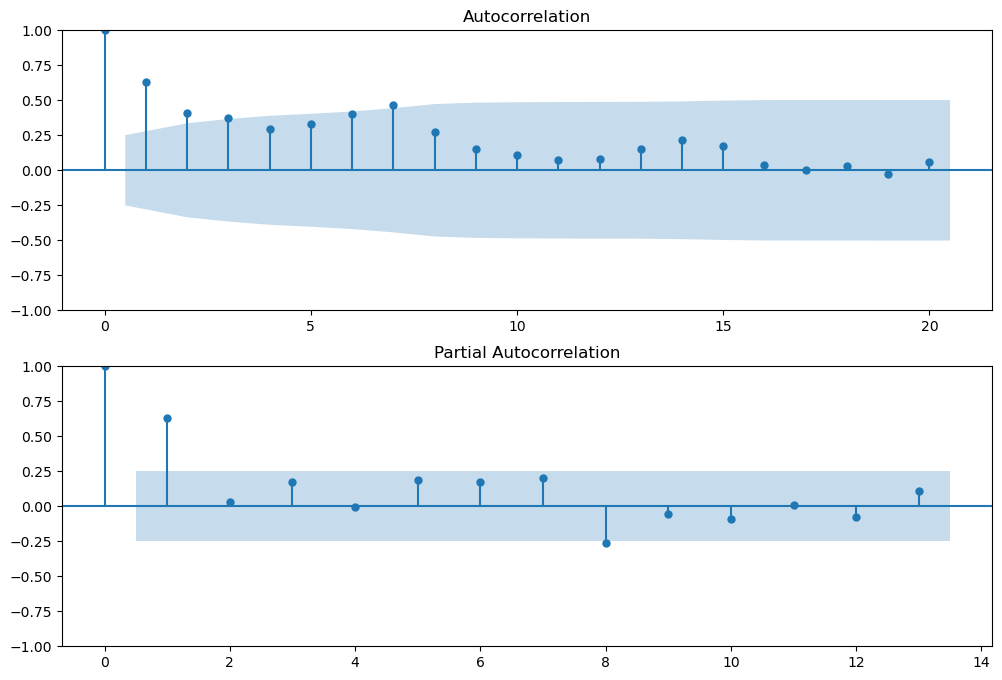

In [16]:
#paso 2 especificando asi el orden de retraos autorregresivos 
fig=plt.figure(figsize=(12,8))
ax1=fig.add_subplot(211)
fig=plot_acf(df_fecha,lags=20,ax=ax1)#informa los retrasos de q
ax2=fig.add_subplot(212)
fig=plot_pacf(df_fecha,lags=13,ax=ax2)#informa los parametros de p

In [20]:
Bim=pd.Series(df_fecha['totalMb'].values,
                  index=pd.DatetimeIndex(
                      data=(tuple(pd.date_range('06/01/2024',
                                                         periods=61,
                                                        freq='D'))),
                                                         freq='D'))

In [65]:
#P R O N O S T I C O 
model1202=ARIMA(df_fecha, order=(1,0,2))
results_M202=model1202.fit()
fcast202=results_M202.predict(star='2024/06/01',end='2024/08/10')

c:\Users\jherreraq1900\AppData\Local\anaconda3\envs\tesis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jherreraq1900\AppData\Local\anaconda3\envs\tesis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jherreraq1900\AppData\Local\anaconda3\envs\tesis\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
c:\Users\jherreraq1900\AppData\Local\anaconda3\envs\tesis\Lib\site-packages\statsmodels\tsa\statespace\representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['star']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.war

In [37]:
fcas400=results_M202.predict(start='2024/07/31',end='2024/08/07')

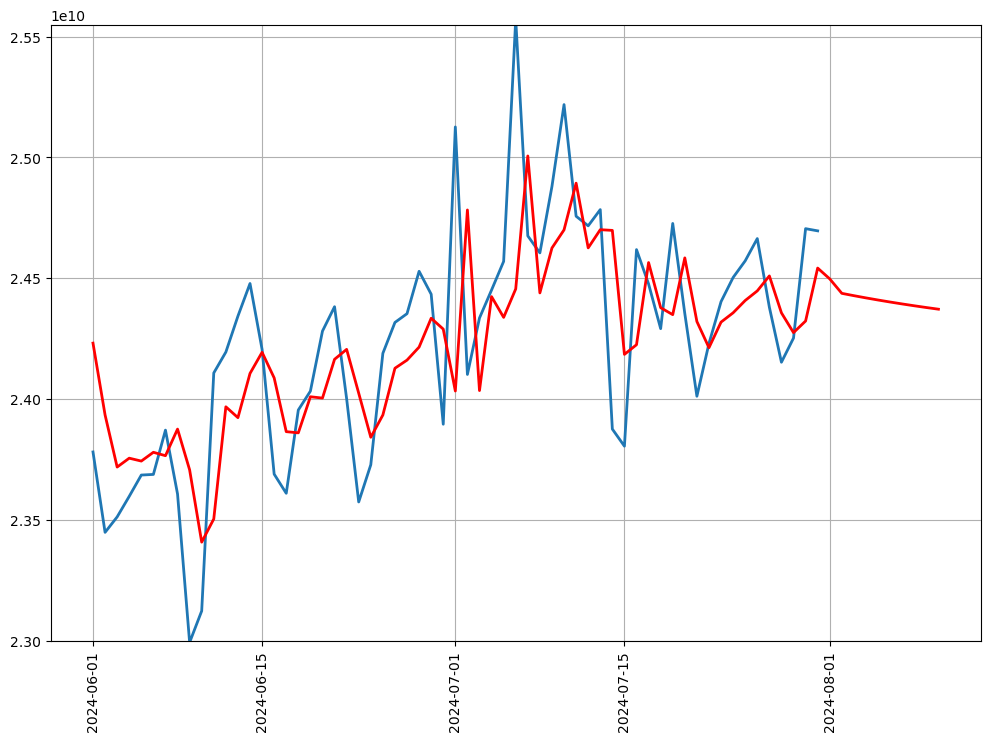

In [66]:
plt.figure(figsize=(12,8))
plt.plot(Bim,linewidth=2,label="original")
plt.plot(fcast202,color="red",linewidth=2,label="ARIMA 2 0 0")
plt.ylim(23000000000,25550000000)
plt.grid()
plt.xticks(rotation=90)
plt.show()

In [31]:
import pmdarima as pm 

In [32]:
mySA=pm.auto_arima(df_fecha,error_action="ignore",suppress_warnings=True,#Desactiva advertencias 
                   seasonal=True,d=1,start_q=1,start_p=1,#Conjunto de datos estacionales 12 observaciones por perido
                   start_Q=0,start_P=0,max_order=5,max_d=1,#Puntos de inicio 
                   max_D=1,D=1,stepwise=False,trace=True)

 ARIMA(0,1,0)(0,0,0)[1] intercept   : AIC=2555.906, Time=0.03 sec
 ARIMA(0,1,1)(0,0,0)[1] intercept   : AIC=2556.749, Time=0.04 sec
 ARIMA(0,1,2)(0,0,0)[1] intercept   : AIC=2560.616, Time=0.08 sec
 ARIMA(0,1,3)(0,0,0)[1] intercept   : AIC=2563.120, Time=0.09 sec
 ARIMA(0,1,4)(0,0,0)[1] intercept   : AIC=2563.889, Time=0.17 sec
 ARIMA(0,1,5)(0,0,0)[1] intercept   : AIC=2565.265, Time=0.13 sec
 ARIMA(1,1,0)(0,0,0)[1] intercept   : AIC=2556.758, Time=0.02 sec
 ARIMA(1,1,1)(0,0,0)[1] intercept   : AIC=2558.808, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[1] intercept   : AIC=2562.436, Time=0.11 sec
 ARIMA(1,1,3)(0,0,0)[1] intercept   : AIC=2563.821, Time=0.15 sec
 ARIMA(1,1,4)(0,0,0)[1] intercept   : AIC=2565.480, Time=0.15 sec
 ARIMA(2,1,0)(0,0,0)[1] intercept   : AIC=2559.089, Time=0.12 sec
 ARIMA(2,1,1)(0,0,0)[1] intercept   : AIC=2560.913, Time=0.13 sec
 ARIMA(2,1,2)(0,0,0)[1] intercept   : AIC=inf, Time=0.38 sec
 ARIMA(2,1,3)(0,0,0)[1] intercept   : AIC=inf, Time=0.50 sec
 ARIMA(3,1,0)(0,0,0)

In [50]:
df_fecha.head 

<bound method NDFrame.head of                  totalMb
fecha                   
2024-06-01  2.378064e+10
2024-06-02  2.344779e+10
2024-06-03  2.351177e+10
2024-06-04  2.359690e+10
2024-06-05  2.368501e+10
...                  ...
2024-07-27  2.437990e+10
2024-07-28  2.415209e+10
2024-07-29  2.425206e+10
2024-07-30  2.470496e+10
2024-07-31  2.469588e+10

[61 rows x 1 columns]>

In [53]:
df_fecha1.to_csv('bimestre1.csv', index=True)

In [54]:
pro=pd.read_csv("bimestre1.csv",header=0,names=['Day','Temp'],index_col=0)

pros=pd.Series((pro.Temp).values,index=pd.date_range('2024-06-01',
                                                           periods=61,
                                                           freq="D"))
pros.head()

2024-06-01    2.378064e+10
2024-06-02    2.344779e+10
2024-06-03    2.351177e+10
2024-06-04    2.359690e+10
2024-06-05    2.368501e+10
Freq: D, dtype: float64

In [55]:
pro_df=pd.DataFrame({'ds':pros.index,
                        'y':pros.values})
pro_df.head()

,ds,y
0,2024-06-01,2.378064e+10
1,2024-06-02,2.344779e+10
2,2024-06-03,2.351177e+10
3,2024-06-04,2.359690e+10
4,2024-06-05,2.368501e+10


In [57]:
pro_df.dtypes

ds    datetime64[ns]
y            float64
dtype: object

In [58]:
from prophet import Prophet

c:\Users\jherreraq1900\AppData\Local\anaconda3\envs\tesis\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [59]:
mymodel =Prophet()
mymodel.fit(pro_df)

19:51:17 - cmdstanpy - INFO - Chain [1] start processing
19:51:17 - cmdstanpy - INFO - Chain [1] done processing


In [60]:
# crear un shell para el pronostico 
future_data=mymodel.make_future_dataframe(periods=31,
                                          freq='d')
fcast=mymodel.predict(future_data)

c:\Users\jherreraq1900\AppData\Local\anaconda3\envs\tesis\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\jherreraq1900\AppData\Local\anaconda3\envs\tesis\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


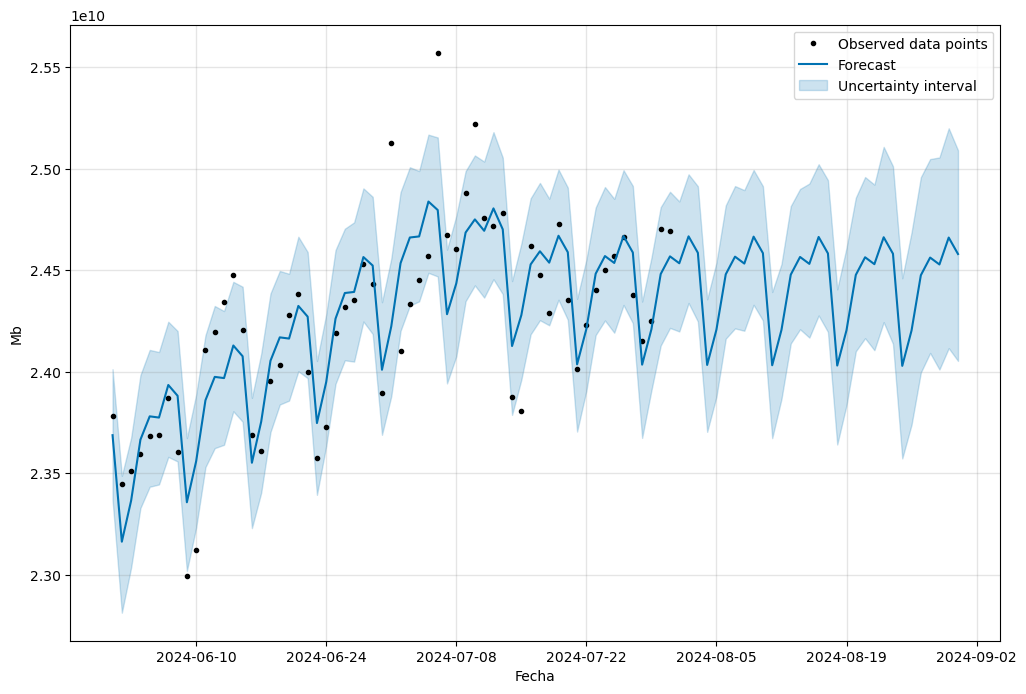

In [61]:
fig,ax1=plt.subplots(1,1,figsize=(12,8))
mymodel.plot(fcast,ax=ax1);
plt.ylabel('Mb')
plt.xlabel("Fecha")
plt.legend()